In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [169]:
df = pd.read_csv('UTSEUS-anjuke-real-estate-baoshan.csv')

In [170]:
df.head()

,id,address,longitude,latitude,bedroom,room,surface,price,onesquaremeter,tags,district,neighborhood,done
0,A888553302,宝山-大场 金地艺境(宝山)(555弄),121.343927,31.319356,2,2,30.0,1160000.0,38666.666667,金地开发 **首推 地铁首通 价格首降 配套就是你能想到的,baoshan,dachang,1
1,A888376847,宝山-大场 骏华苑,121.407325,31.302368,1,1,38.0,1950000.0,51315.789474,龙璟公馆嘉兴市近万达广场，北大附属实验校区，地铁沿线高铁站旁,baoshan,dachang,1
2,A885088482,宝山-大场 琉樽尚品(255弄),121.397487,31.290871,3,2,92.0,5350000.0,58152.173913,92+7平书房，婚房装修30万！满2年税少11万！再降20万,baoshan,dachang,1
3,A885392981,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,2,2,68.0,4350000.0,63970.588235,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang,1
4,A885831305,宝山-大场 美好家小区,121.421397,31.302658,2,2,80.0,4000000.0,50000.000000,美好家南北通精装2房板式房型采光好随时好看带天井,baoshan,dachang,1


In [171]:
df.columns

Index(['id', 'address', 'longitude', 'latitude', 'bedroom', 'room', 'surface',
       'price', 'onesquaremeter', 'tags', 'district', 'neighborhood', 'done'],
      dtype='object')

The goal is to predict the price from the others variable

### 1 we start by using decision tree

In [172]:
from sklearn import tree

In [173]:
df.columns

Index(['id', 'address', 'longitude', 'latitude', 'bedroom', 'room', 'surface',
       'price', 'onesquaremeter', 'tags', 'district', 'neighborhood', 'done'],
      dtype='object')

In [174]:
X = df[['longitude','latitude','bedroom','room','surface']]
Y = df['onesquaremeter']

(array([1.000e+00, 6.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 9.000e+00,
        7.000e+00, 5.000e+00, 4.200e+01, 6.700e+01, 3.800e+01, 2.000e+01,
        1.730e+02, 1.810e+02, 2.190e+02, 2.840e+02, 1.390e+02, 1.600e+02,
        1.310e+02, 1.420e+02, 3.620e+02, 2.580e+02, 3.280e+02, 4.490e+02,
        4.200e+02, 4.340e+02, 3.820e+02, 2.980e+02, 3.130e+02, 2.590e+02,
        3.480e+02, 3.600e+02, 3.270e+02, 4.590e+02, 4.820e+02, 6.550e+02,
        7.510e+02, 9.160e+02, 1.013e+03, 1.096e+03, 1.358e+03, 1.356e+03,
        1.383e+03, 1.614e+03, 1.405e+03, 1.340e+03, 1.409e+03, 1.254e+03,
        1.330e+03, 9.770e+02, 1.126e+03, 8.660e+02, 8.720e+02, 7.570e+02,
        7.080e+02, 5.850e+02, 6.060e+02, 5.970e+02, 5.150e+02, 4.710e+02,
        3.200e+02, 3.640e+02, 2.910e+02, 2.410e+02, 2.540e+02, 2.290e+02,
        1.110e+02, 8.200e+01, 1.070e+02, 8.000e+01, 4.300e+01, 1.050e+02,
        3.100e+01, 1.700e+01, 1.600e+01, 6.000e+00, 1.000e+00, 5.000e+00,
        8.000e+00, 1.000e+00, 9.000e+0

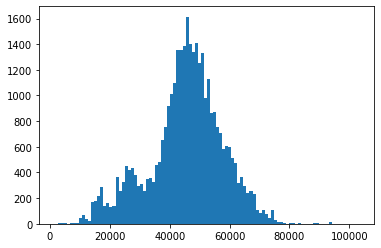

In [175]:
plt.hist(Y, 100)

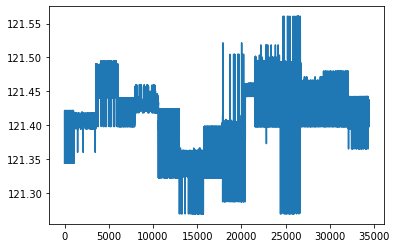

In [176]:
plt.plot(X['longitude'])

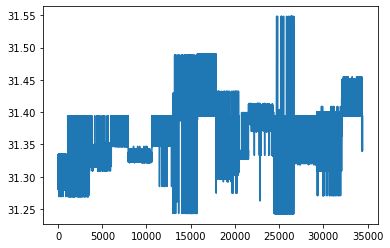

In [177]:
plt.plot(X['latitude'])

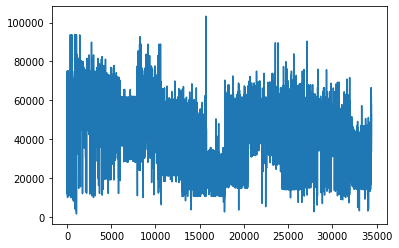

In [178]:
plt.plot(Y)

In [179]:
medianY = np.median(Y)

In [180]:
Z = pd.DataFrame.copy(Y)
Z[Y < medianY] = "cheap"
Z[Y >= medianY] = "expensive"

In [181]:
df2 = pd.DataFrame.copy(X)
df2['class'] = Z

Here we have done the model in the all dataset

In [182]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Z)

In [183]:
clf.predict([[121,31,3,5,200]])

array(['cheap'], dtype=object)

Then we split the dataset in 2 parts: train and test

In [184]:
from sklearn.model_selection import train_test_split
def splitTrainTest(df, testSize = 0.3, nameColumnClass = 'class'):
    train, test = train_test_split(df, test_size=testSize, shuffle=True)
    result = [train.drop(columns=[nameColumnClass]), train[nameColumnClass], test.drop(columns=[nameColumnClass]), test[nameColumnClass]]
    return result


In [185]:
X_train, Z_train, X_test, Z_test = splitTrainTest(df2) #by default the test part represent 30% of the data

We check the length of the split

In [186]:
print(len(X_train))
print(len(X_test))
print(len(X_test)/(len(X_train)+len(X_test)))

24091
10325
0.3000058112505811


In [193]:
#We calculate the model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Z_train)

In [191]:
#We launch the prediction/validation on the test value
prediction = clf.predict(X_test)

In [192]:
np.mean(prediction == Z_test)

0.8687651331719128

We use the cross validation (If we don't shuffle the dataset the result of the crossvalidation is not representative)

In [195]:
# Without shuffle (we can see why the result is bad in the previous plot)
from sklearn.model_selection import cross_val_score
clf = tree.DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(clf, X, Z, cv=5)
np.mean(scores)

0.5755544422535779

In [197]:
# With shuffle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
clf = tree.DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(clf, X, Z, cv=ShuffleSplit(n_splits=5))
np.mean(scores)

0.800348634514817

[Text(418.5, 453.0, 'X[1] <= 31.348\nentropy = 0.5\nsamples = 24091\nvalue = [11959, 12132]'),
 Text(209.25, 271.8, 'X[4] <= 77.5\nentropy = 0.328\nsamples = 11517\nvalue = [2385, 9132]'),
 Text(104.625, 90.59999999999997, 'entropy = 0.41\nsamples = 6071\nvalue = [1748, 4323]'),
 Text(313.875, 90.59999999999997, 'entropy = 0.207\nsamples = 5446\nvalue = [637, 4809]'),
 Text(627.75, 271.8, 'X[1] <= 31.405\nentropy = 0.363\nsamples = 12574\nvalue = [9574, 3000]'),
 Text(523.125, 90.59999999999997, 'entropy = 0.43\nsamples = 9063\nvalue = [6227, 2836]'),
 Text(732.375, 90.59999999999997, 'entropy = 0.089\nsamples = 3511\nvalue = [3347, 164]')]

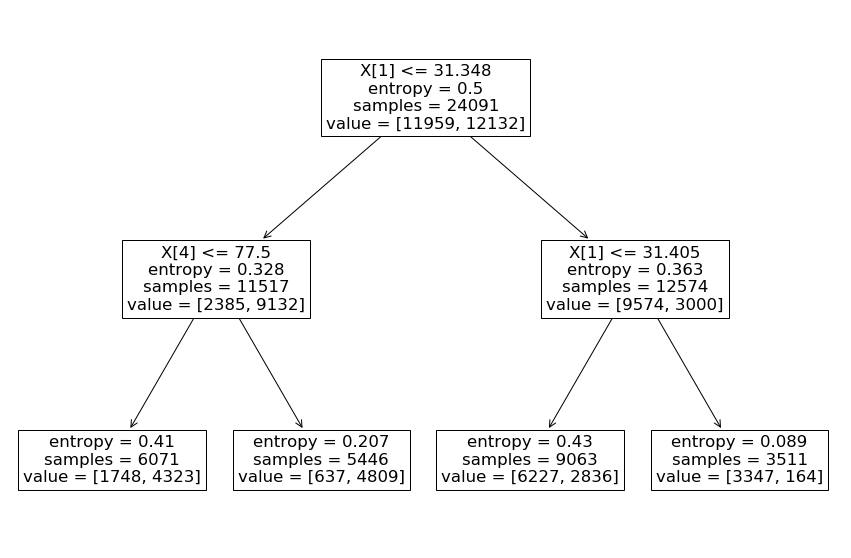

In [198]:
# We plot the decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, Z_train)
plt.figure(figsize=(15,10))
tree.plot_tree(clf)

get the best CV using GridSearchCV

In [199]:
# We  want to determine the best CV

from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
param_grid = {'max_depth': [2,4,6,8,10,20,40,100]}
#calibrated_decisionTree = CalibratedClassifierCV(base_estimator=tree.DecisionTreeClassifier())
search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv= ShuffleSplit(n_splits=5))
search.fit(X,Z)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 

In [201]:
# We get the max_depth
search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [129]:
# result: max_depth = 40
clf = tree.DecisionTreeClassifier(max_depth=40)
scores = cross_val_score(clf, X, Z, cv=ShuffleSplit(n_splits=5))
np.mean(scores)

0.8709543568464729

In [203]:
#Best model for the decision tree 
clf = tree.DecisionTreeClassifier(max_depth=40)
clf = clf.fit(X_train, Z_train)
prediction = clf.predict(X_test)
np.mean(prediction == Z_test)

0.8691525423728813

Random Forest Classifier

In [205]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=25, random_state=0, n_estimators = 100)
clf = clf.fit(X_train, Z_train)
prediction = clf.predict(X_test)
np.mean(prediction == Z_test)

0.8735108958837773